In [1]:
# imports libs 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lendo dataset
df = pd.read_csv('C:\\Users\\souza\\OneDrive\\Área de Trabalho\\Risk Nubank\\data\\acquisition_train.csv', delimiter=',')
df

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


In [3]:
# columns infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

In [4]:
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [5]:

df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


In [6]:
# nan values 
df.isnull().sum()

ids                                                     0
target_default                                       3259
score_1                                               562
score_2                                               562
score_3                                               562
score_4                                                 0
score_5                                                 0
score_6                                                 0
risk_rate                                             562
last_amount_borrowed                                29956
last_borrowed_in_months                             29956
credit_limit                                        13800
reason                                                566
income                                                562
facebook_profile                                     4458
state                                                 562
zip                                                   562
channel       

In [7]:
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [8]:
# selecionando apenas variaveis importantes para o problema 
df2 = df.copy()
df2 = df2[['target_default', 'score_3', 'risk_rate', 'credit_limit', 'income', 'n_defaulted_loans', 'n_accounts', 'n_issues',
            'ok_since', 'n_bankruptcies' ]]

In [9]:
df2.isnull().sum()

target_default        3259
score_3                562
risk_rate              562
credit_limit         13800
income                 562
n_defaulted_loans      574
n_accounts             562
n_issues             11544
ok_since             26545
n_bankruptcies         697
dtype: int64

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target_default     41741 non-null  object 
 1   score_3            44438 non-null  float64
 2   risk_rate          44438 non-null  float64
 3   credit_limit       31200 non-null  float64
 4   income             44438 non-null  float64
 5   n_defaulted_loans  44426 non-null  float64
 6   n_accounts         44438 non-null  float64
 7   n_issues           33456 non-null  float64
 8   ok_since           18455 non-null  float64
 9   n_bankruptcies     44303 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


In [11]:
# selecionando variaveis para drop 
nan_variables = ['score_3', 'risk_rate', 'income', 'n_defaulted_loans', 'n_accounts']
df2 = df2.dropna(subset=nan_variables)


In [12]:
df2.isnull().sum()

target_default        2697
score_3                  0
risk_rate                0
credit_limit         13226
income                   0
n_defaulted_loans        0
n_accounts               0
n_issues             10970
ok_since             25983
n_bankruptcies         123
dtype: int64

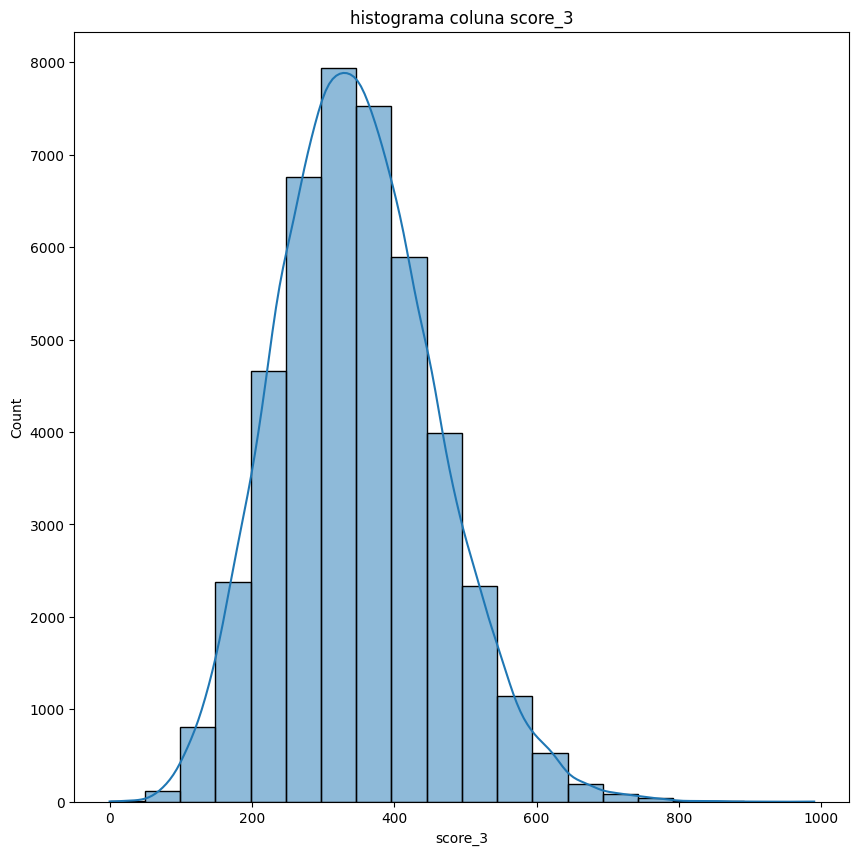

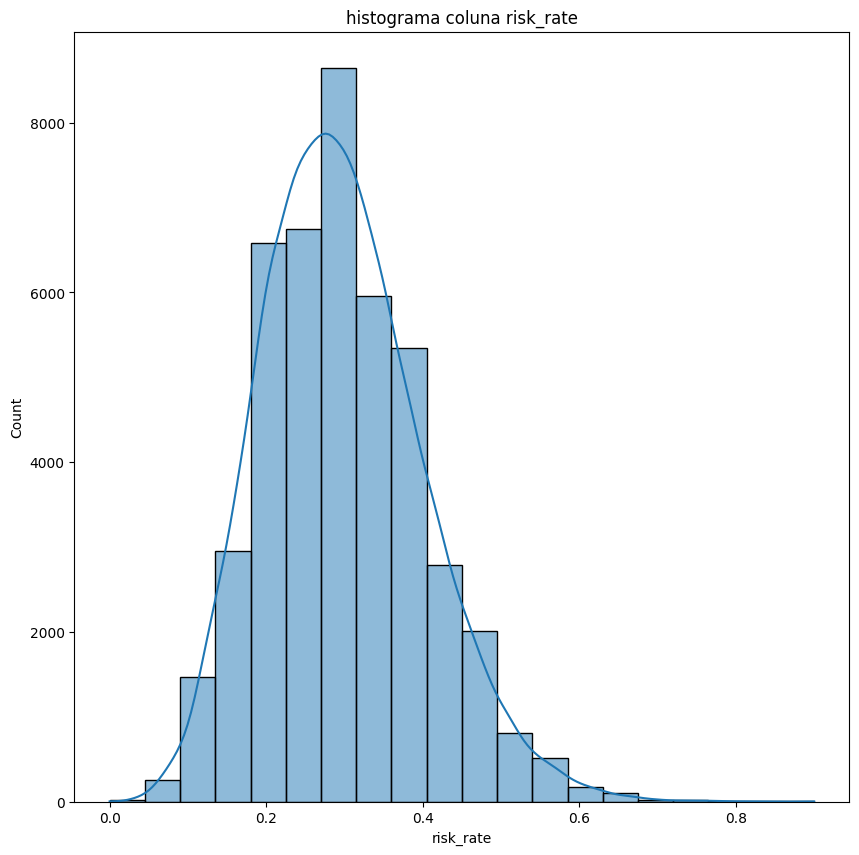

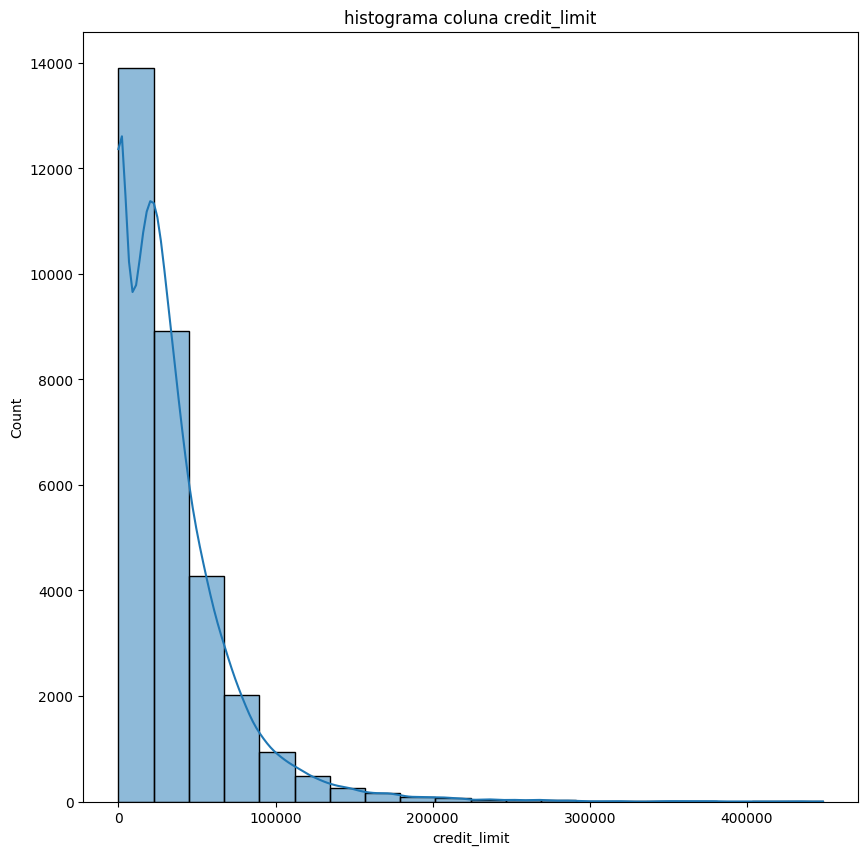

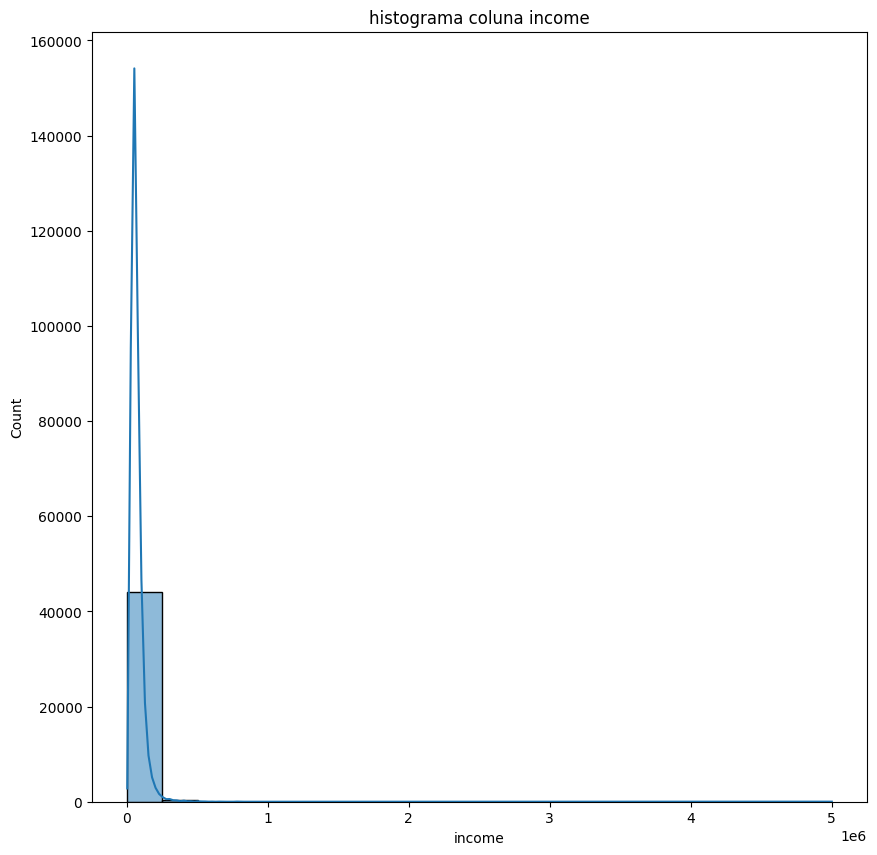

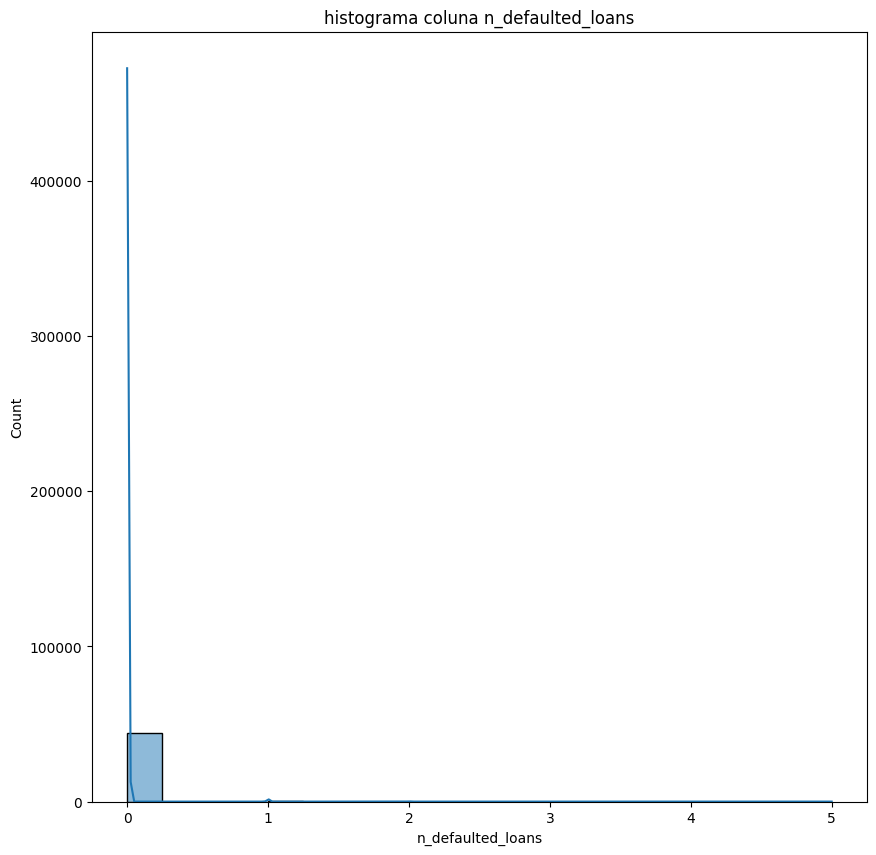

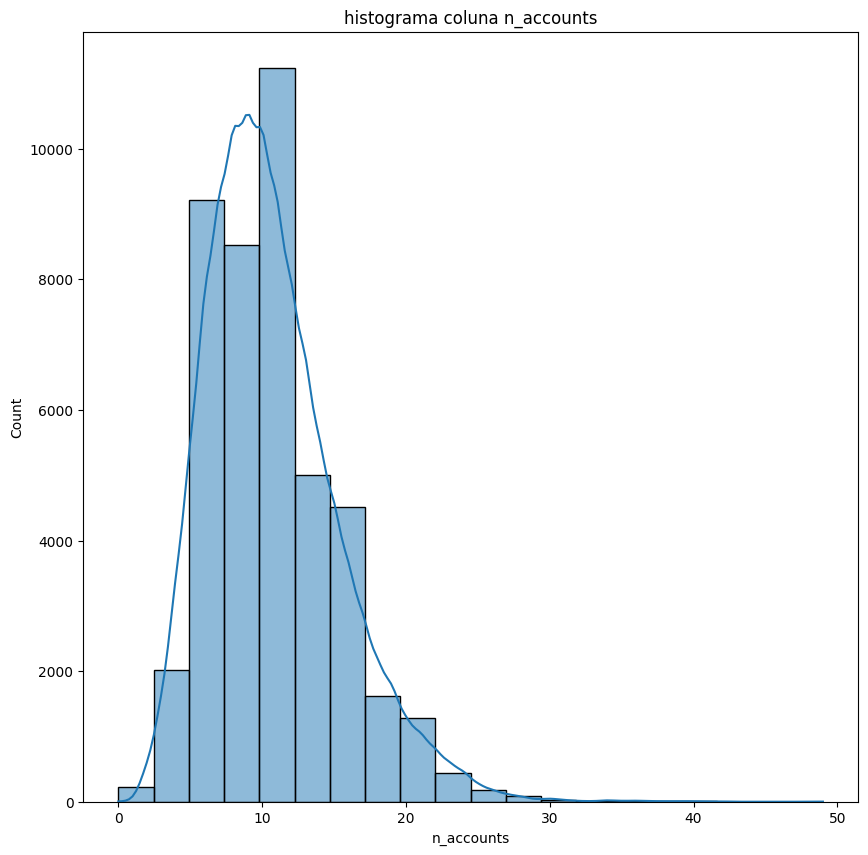

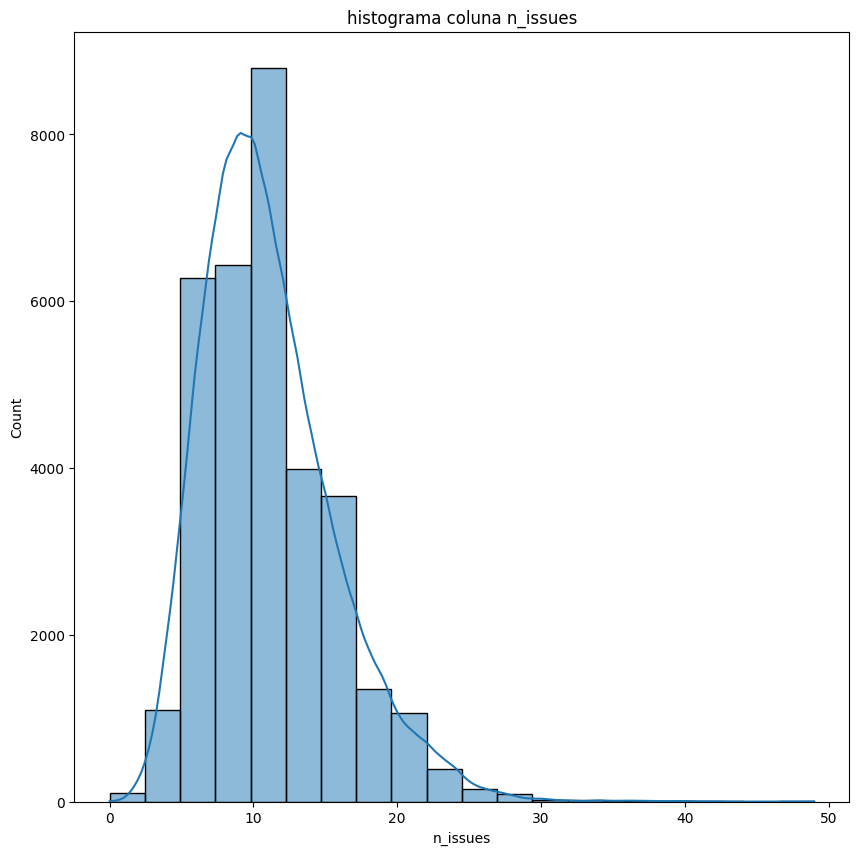

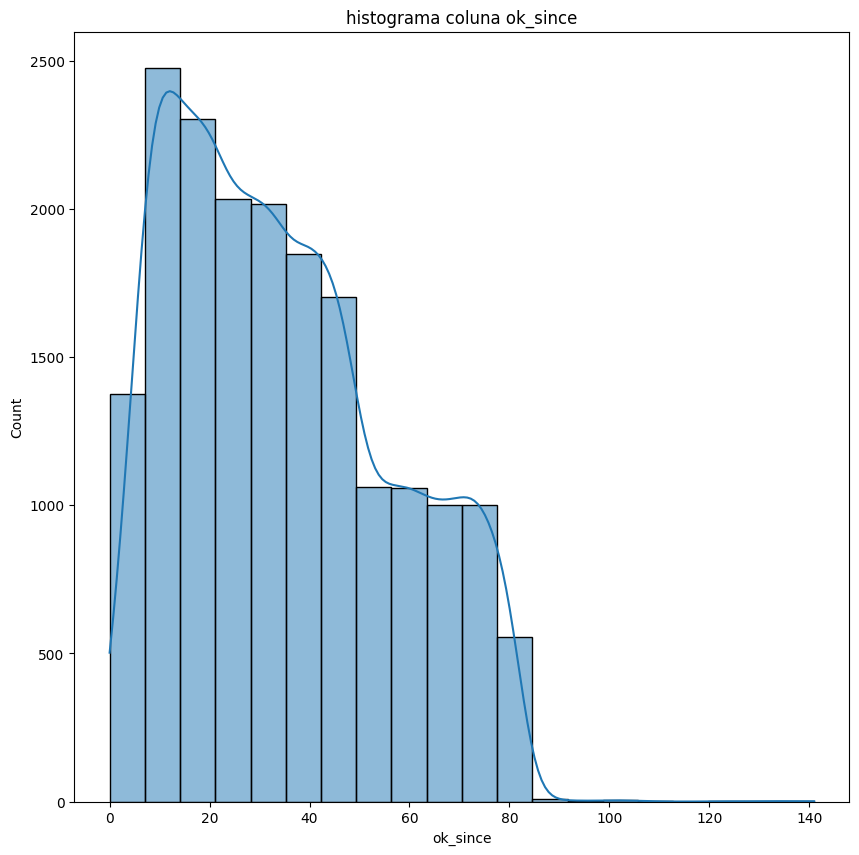

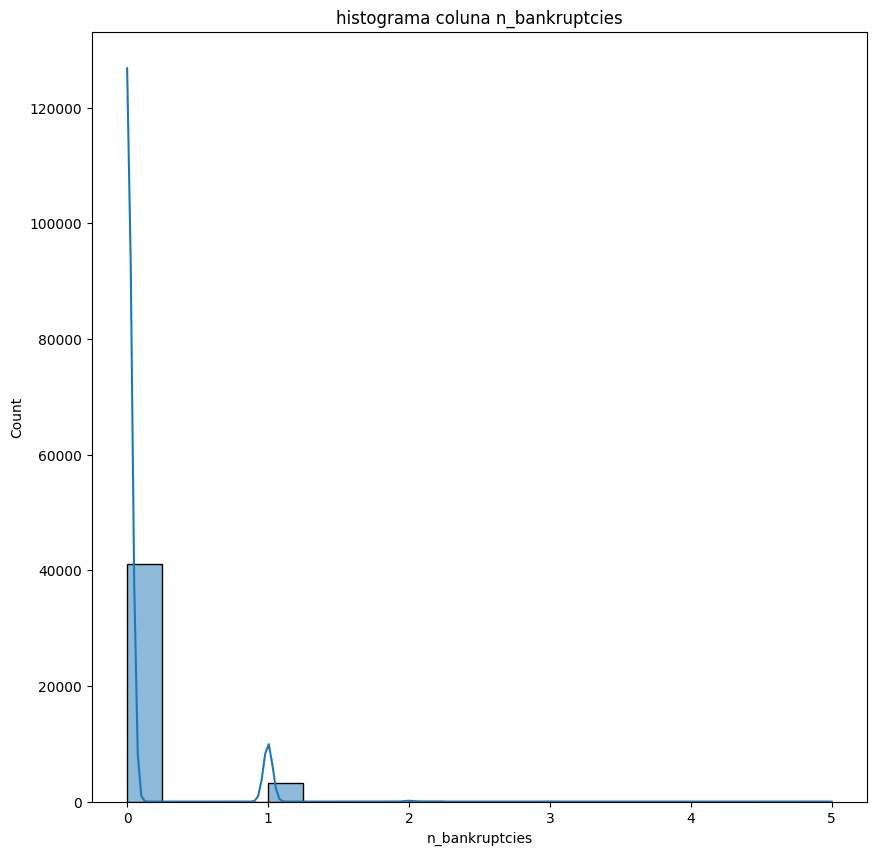

In [13]:
# buscando entender as distribuiçoes das variaveis numericas do nosso problema 
num_col = df2.select_dtypes(exclude='object')
for num in num_col:
    plt.figure(figsize=(10,10))
    plt.title(f'histograma coluna {num}')
    sns.histplot(df2[num], kde=True, bins=20)

In [14]:
df2.shape

(44426, 10)

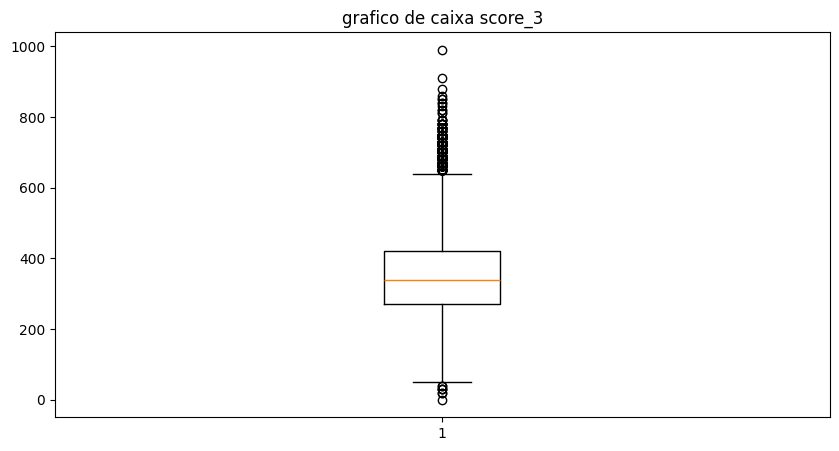

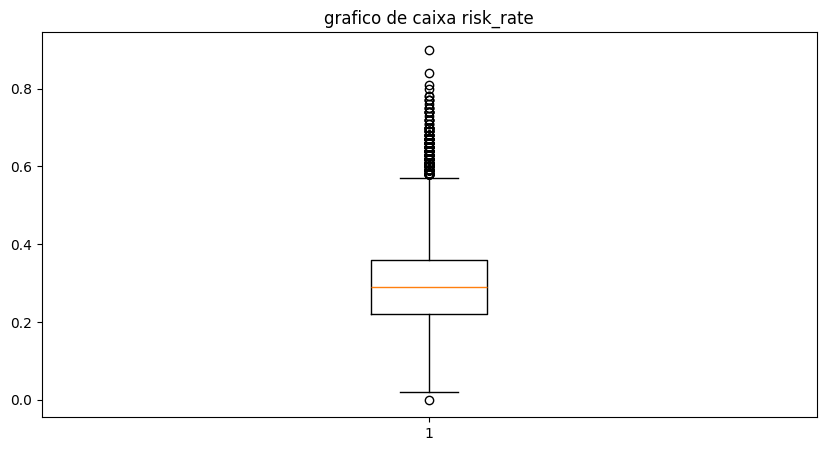

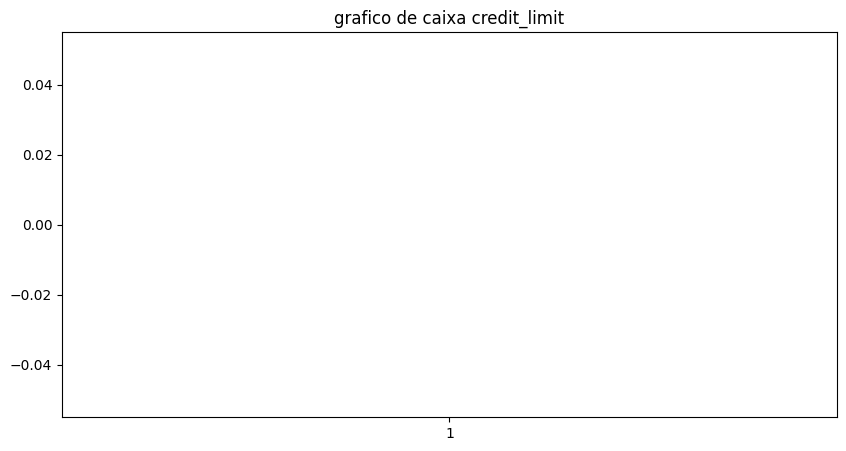

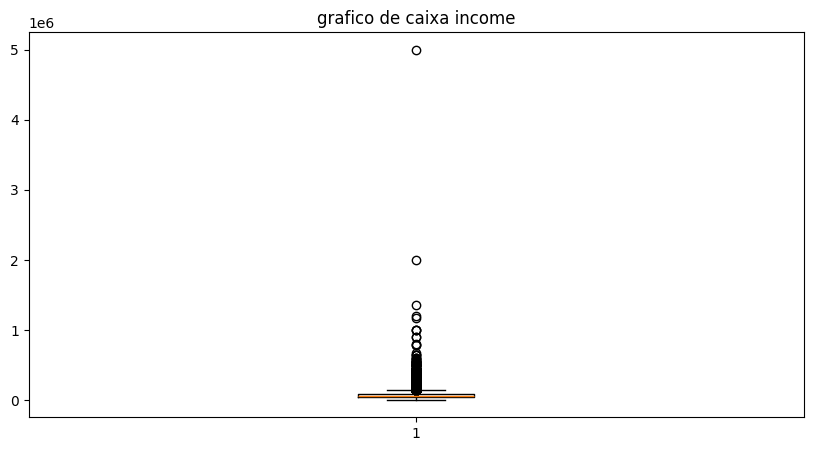

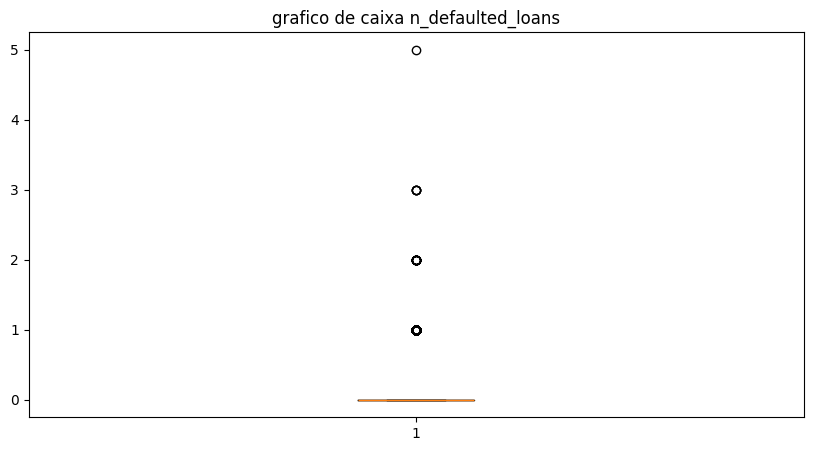

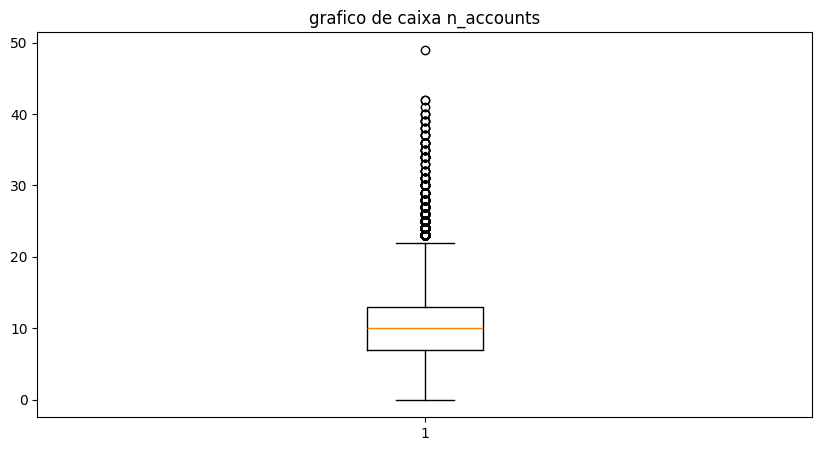

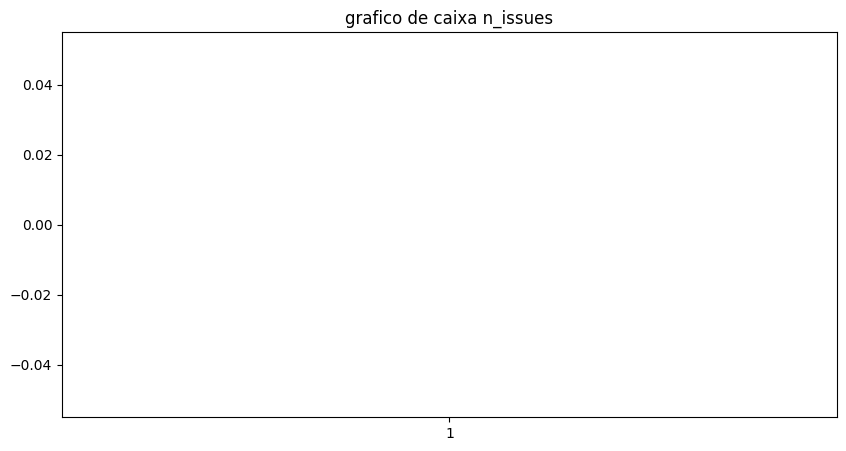

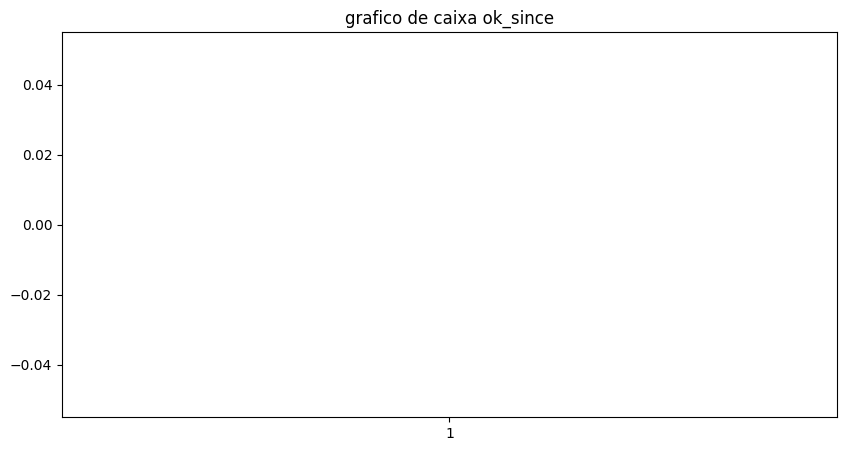

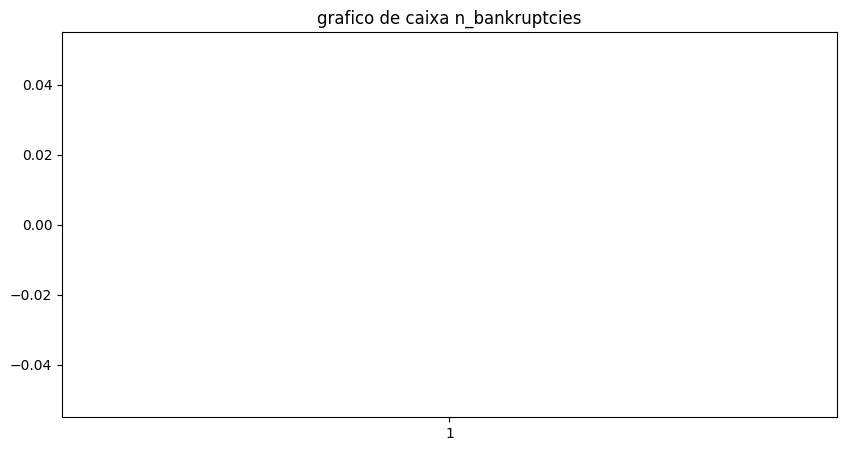

In [15]:
# plotando graficos de caixa
for box in num_col:
    plt.figure(figsize=(10,5))
    plt.title(f'grafico de caixa {box}')
    plt.boxplot(df2[box])

In [16]:
df2.isnull().sum()

target_default        2697
score_3                  0
risk_rate                0
credit_limit         13226
income                   0
n_defaulted_loans        0
n_accounts               0
n_issues             10970
ok_since             25983
n_bankruptcies         123
dtype: int64

In [17]:
# para nao enviesar a analise e uma possivel modelagem como valores fora da realidade, vamos substituir os valores pela sua mediana, criando assim um comportamneto medio
median_values = ['credit_limit', 'n_issues', 'ok_since']
df2[median_values] = df2[median_values].fillna(df2[median_values].median())

In [18]:
df2.isnull().sum()

target_default       2697
score_3                 0
risk_rate               0
credit_limit            0
income                  0
n_defaulted_loans       0
n_accounts              0
n_issues                0
ok_since                0
n_bankruptcies        123
dtype: int64

In [19]:
# retirando valores nulos da coluna target_default
df2 = df2[df2['target_default'].notna()]
df2.isnull().sum()

target_default         0
score_3                0
risk_rate              0
credit_limit           0
income                 0
n_defaulted_loans      0
n_accounts             0
n_issues               0
ok_since               0
n_bankruptcies       123
dtype: int64

In [20]:
# transformando 'target_default' de bolean para int
df2['target_default'] = df2['target_default'].replace(to_replace=True, value=1)
df2['target_default'] = df2['target_default'].replace(to_replace=False, value=0)

In [21]:
df2['target_default'].unique()

array([0, 1], dtype=int64)

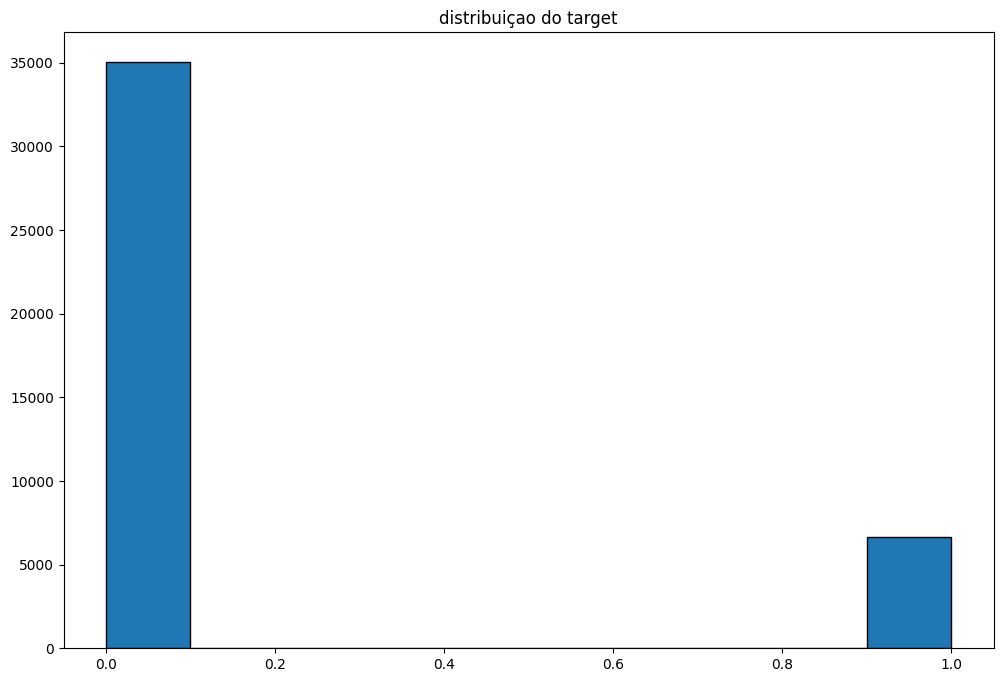

In [22]:
# distribuiçao do target
plt.figure(figsize=(12,8))
plt.title('distribuiçao do target')
plt.hist(df2['target_default'], edgecolor='black')
plt.show()

Esse target é um target default dado pelo dataset. Ao decorrer desse trabalho, vou modelar um novo target dado um modelo de Ever90m12

In [23]:
# retirando valores nulos de 'n_bankruptcies'
df2 = df2[df['n_bankruptcies'].notna()]

In [24]:
df2.isnull().sum()

target_default       0
score_3              0
risk_rate            0
credit_limit         0
income               0
n_defaulted_loans    0
n_accounts           0
n_issues             0
ok_since             0
n_bankruptcies       0
dtype: int64

In [25]:
df2.shape

(41606, 10)

Analise Multivariada

In [26]:
df2.head()

,target_default,score_3,risk_rate,credit_limit,income,n_defaulted_loans,n_accounts,n_issues,ok_since,n_bankruptcies
0,0,350.0,0.40,0.0,65014.12,0.0,18.0,18.0,32.0,0.0
1,0,370.0,0.24,39726.0,100018.91,0.0,14.0,14.0,50.0,0.0
2,1,360.0,0.29,25647.0,65023.65,0.0,10.0,10.0,32.0,0.0
3,0,510.0,0.32,54591.0,68830.01,0.0,19.0,19.0,32.0,1.0
4,0,500.0,0.18,25647.0,60011.29,0.0,11.0,10.0,32.0,0.0


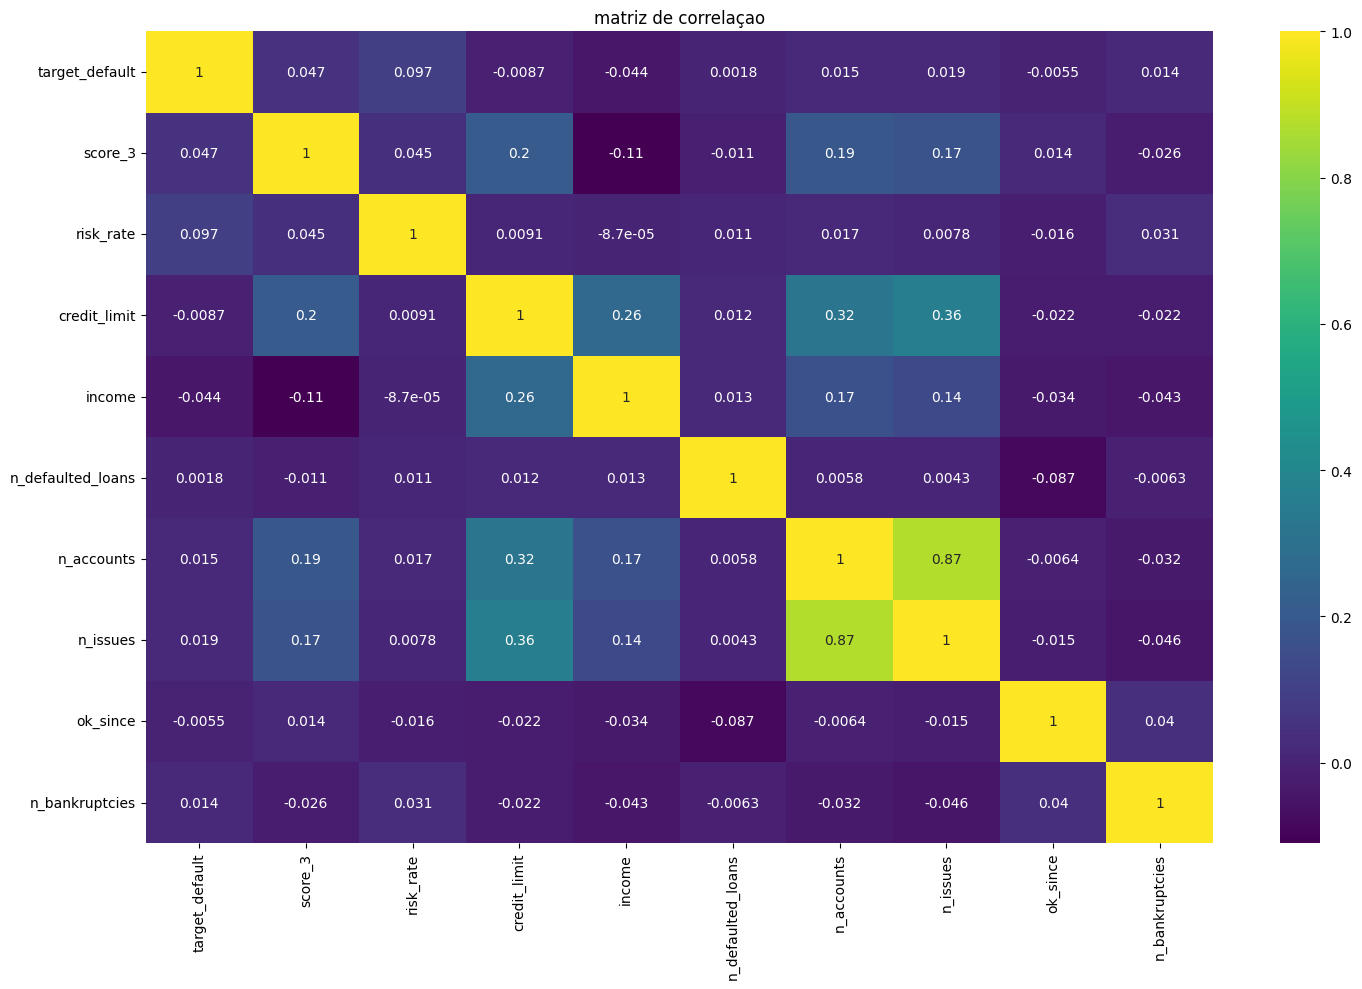

In [27]:
# plotando matriz de correlação 
plt.figure(figsize=(15,10))
plt.title('matriz de correlaçao')
sns.heatmap(df2.corr(), annot=True, cbar=True, cmap='viridis')
plt.tight_layout()
plt.show()

In [28]:
df2['score_3'].value_counts()

score_3
330.0    1529
350.0    1514
320.0    1506
310.0    1481
300.0    1471
         ... 
910.0       1
860.0       1
990.0       1
880.0       1
0.0         1
Name: count, Length: 87, dtype: int64

In [29]:
# criação de nova coluna categoria com base ao score
def score_rating(score):
    if score < 400:
        return 'low'
    elif score <= 500:
        return 'medium'
    elif score <= 600:
        return 'good'
    else:
        return 'excellent'


df2['score_rating'] = df2['score_3'].apply(score_rating)


In [30]:
# vizualizando linhas que contem scores excelentes
df2[df2['score_rating'] =='excellent'].head()

,target_default,score_3,risk_rate,credit_limit,income,n_defaulted_loans,n_accounts,n_issues,ok_since,n_bankruptcies,score_rating
71,0,620.0,0.08,25647.0,75023.30,0.0,10.0,10.0,32.0,0.0,excellent
157,0,780.0,0.29,91611.0,85016.18,0.0,13.0,13.0,46.0,0.0,excellent
214,1,650.0,0.45,33120.0,48011.79,0.0,9.0,9.0,32.0,0.0,excellent
355,0,690.0,0.49,32594.0,62984.51,0.0,9.0,9.0,34.0,0.0,excellent
366,0,630.0,0.14,35554.0,46016.94,0.0,12.0,12.0,20.0,0.0,excellent


In [31]:
df2['score_rating'].value_counts()

score_rating
low          28461
medium        9694
good          2798
excellent      653
Name: count, dtype: int64

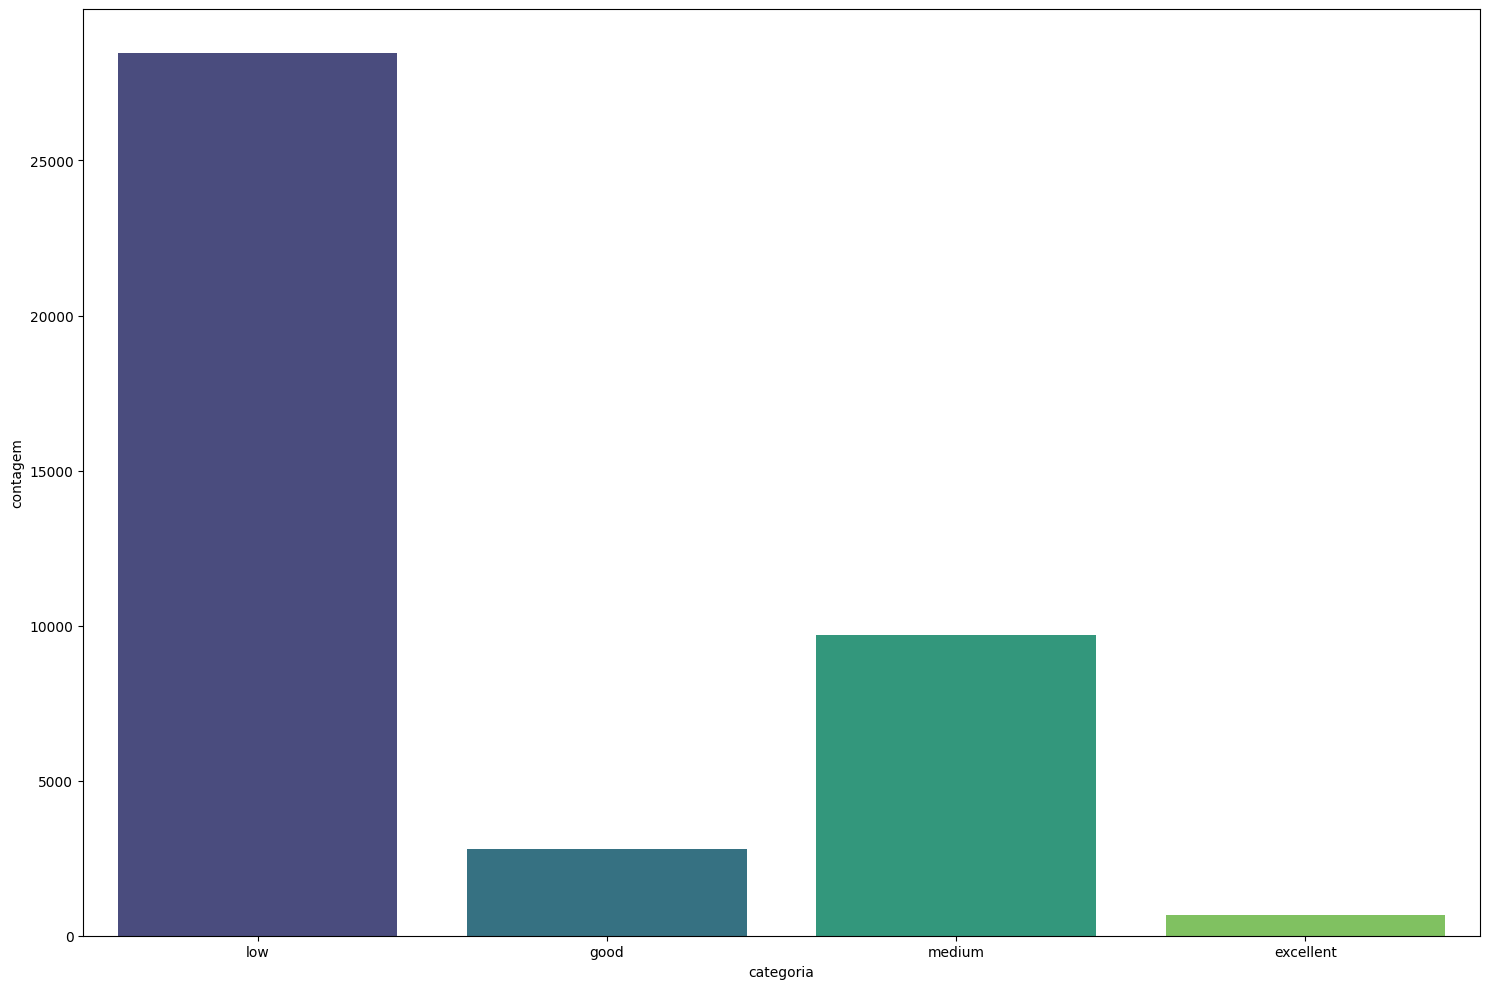

In [32]:
# vizualizando nova categoria 
plt.figure(figsize=(15,10))
sns.countplot(x = df2['score_rating'], palette='viridis')
plt.xlabel('categoria')
plt.ylabel('contagem')
plt.tight_layout()
plt.show()

Entendendo comportamento da nova categoria 

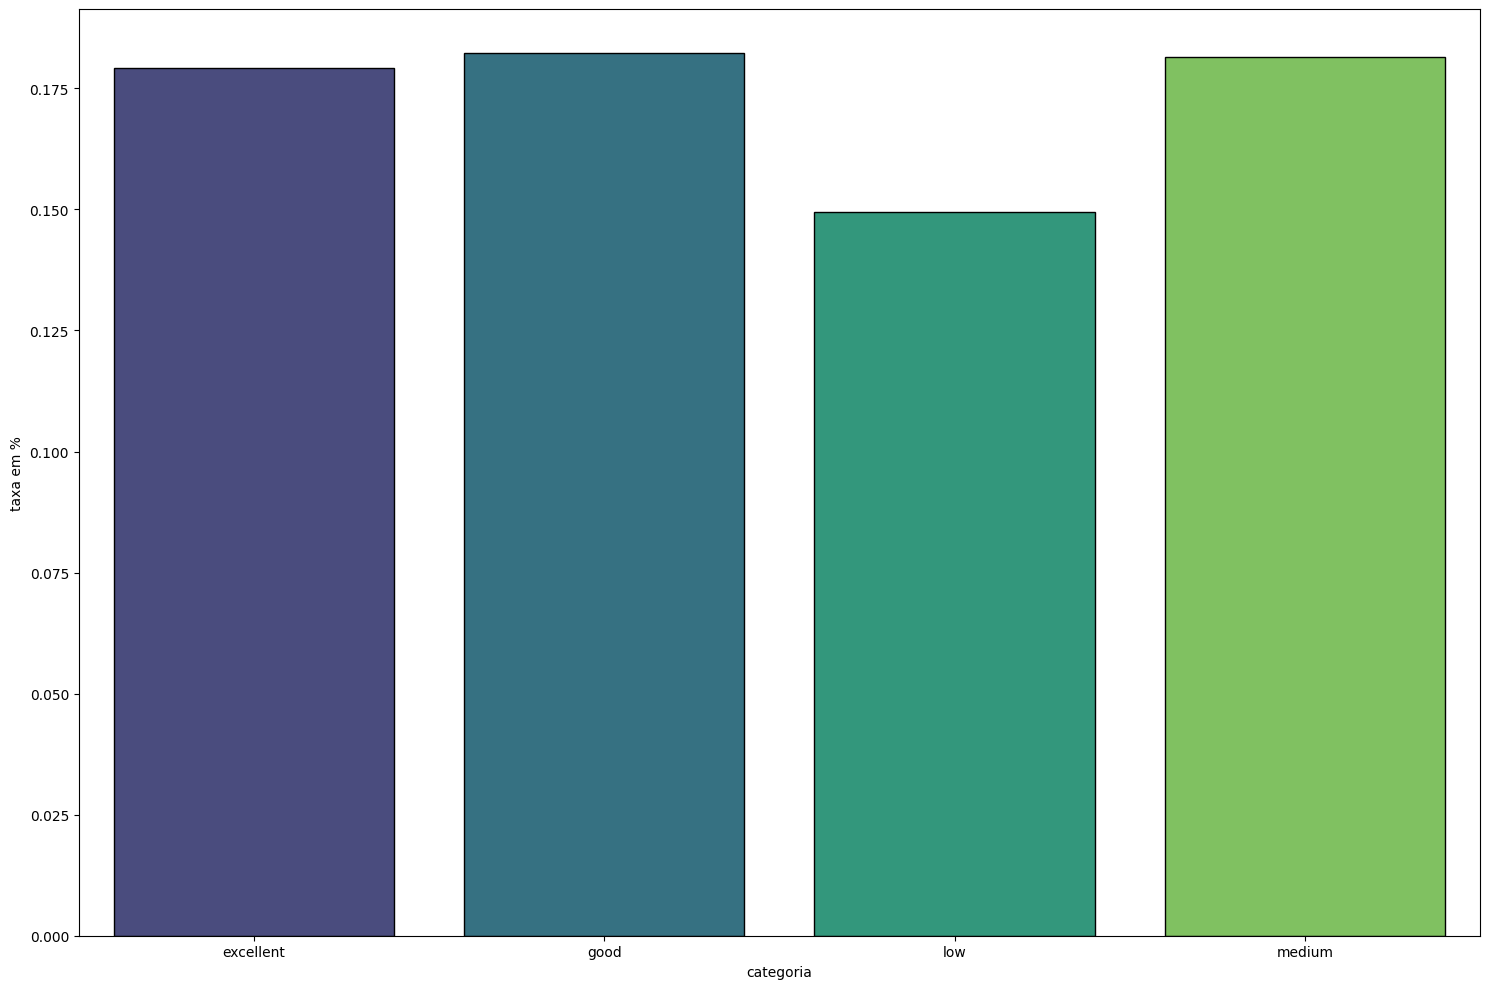

In [33]:
# taxa de cura entre os score_rating
cure  = df2.groupby('score_rating')['target_default'].mean().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(data=cure, x='score_rating', y='target_default', palette='viridis', edgecolor='black')
plt.xlabel('categoria')
plt.ylabel('taxa em %')
plt.tight_layout()
plt.show()

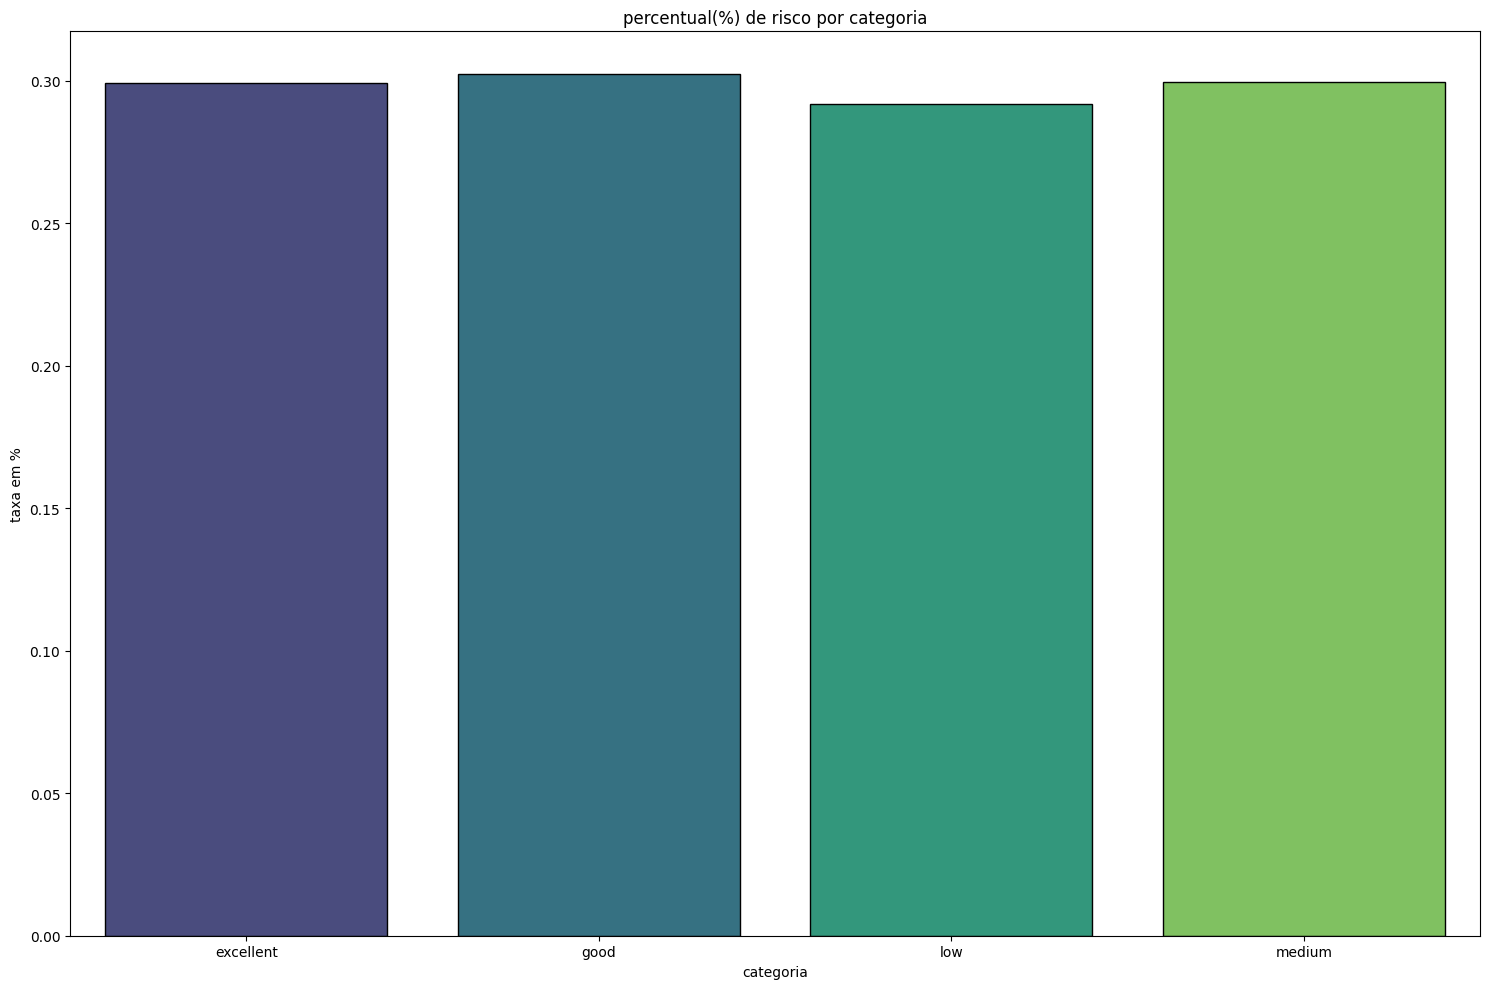

In [34]:
# percentual de risco por categorias
risk_cat = df2.groupby('score_rating')['risk_rate'].mean().reset_index()
plt.figure(figsize=(15,10))
plt.title('percentual(%) de risco por categoria')
sns.barplot(data=risk_cat, x='score_rating', y='risk_rate', edgecolor='black', palette='viridis')
plt.xlabel('categoria')
plt.ylabel('taxa em %')
plt.tight_layout()
plt.show()

In [35]:
# criando nova coluna rating_score_enc para nova matriz de correlação
le = LabelEncoder()
df2['score_rating_enc'] = le.fit_transform(df2['score_rating'])

In [36]:
# criando novo objeto df excluindo antiga coluna score_rating
df2_enc = df2.drop('score_rating', axis=1)

In [37]:
df2_enc

,target_default,score_3,risk_rate,credit_limit,income,n_defaulted_loans,n_accounts,n_issues,ok_since,n_bankruptcies,score_rating_enc
0,0,350.0,0.40,0.0,65014.12,0.0,18.0,18.0,32.0,0.0,2
1,0,370.0,0.24,39726.0,100018.91,0.0,14.0,14.0,50.0,0.0,2
2,1,360.0,0.29,25647.0,65023.65,0.0,10.0,10.0,32.0,0.0,2
3,0,510.0,0.32,54591.0,68830.01,0.0,19.0,19.0,32.0,1.0,1
4,0,500.0,0.18,25647.0,60011.29,0.0,11.0,10.0,32.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
44995,0,280.0,0.17,10627.0,100013.24,0.0,7.0,7.0,37.0,0.0,2
44996,0,370.0,0.27,36262.0,95026.69,0.0,16.0,16.0,32.0,0.0,2
44997,0,280.0,0.30,0.0,106020.90,0.0,6.0,6.0,7.0,0.0,2
44998,1,240.0,0.37,0.0,185018.07,0.0,10.0,10.0,53.0,0.0,2


<Axes: >

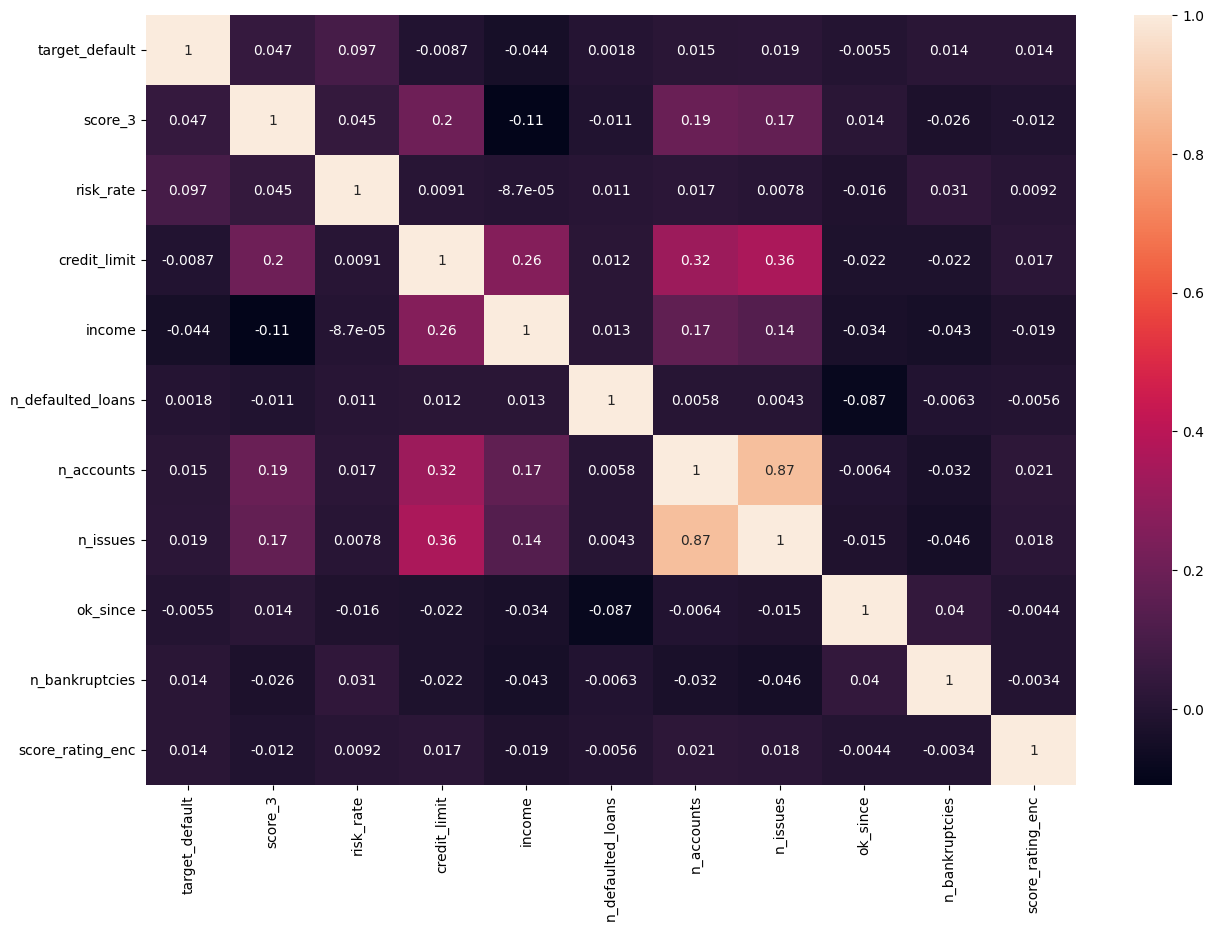

In [38]:
# nova matriz de correlação
plt.figure(figsize=(15,10))
sns.heatmap(df2_enc.corr(), annot=True)

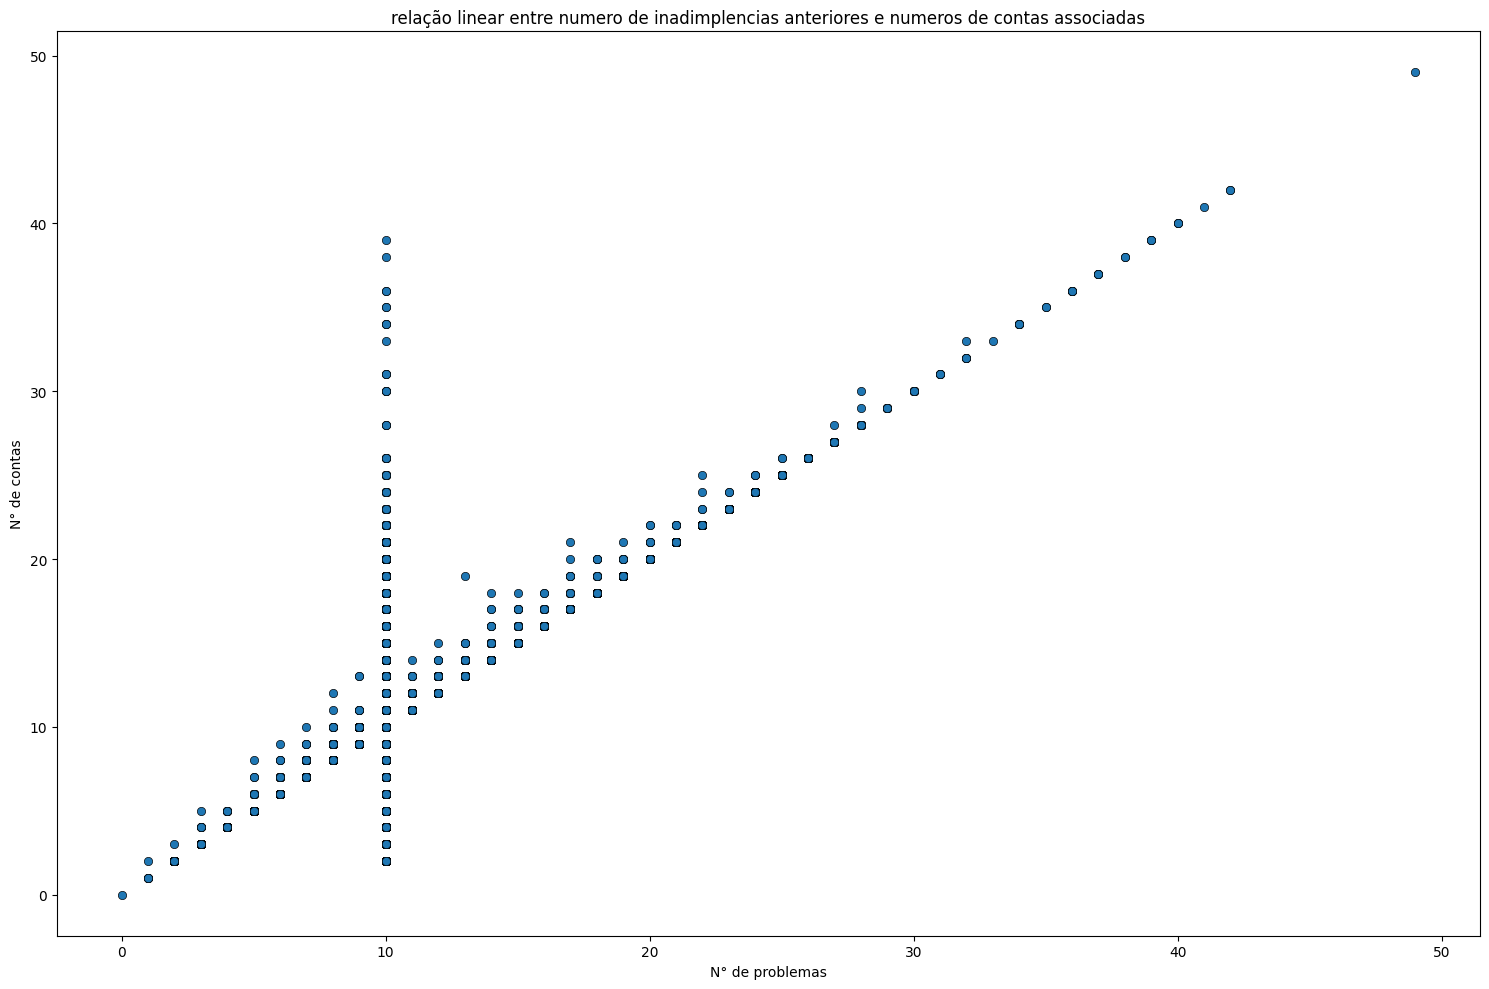

In [39]:
# entendendo a relação linear entre numero de contas e numeros de problemas (inadimplencias)
plt.figure(figsize=(15,10))
plt.title('relação linear entre numero de inadimplencias anteriores e numeros de contas associadas')
sns.scatterplot(x=df2['n_issues'], y=df2['n_accounts'], edgecolor='black')
plt.xlabel('N° de problemas')
plt.ylabel('N° de contas')
plt.tight_layout()
plt.show()

Por praticamente indicar a mesma informaçao, irei dropar a coluna 'n_accounts'

In [40]:
df2 = df2.drop('n_accounts', axis=1)

 A relação entre numeros de inadimplecias e numeros de contas associadas é quase linear!
 

In [41]:
# vizualizando o cliente com o maior risco de inadimplencia da base de dados
df2[df2['risk_rate'] == 0.9]

,target_default,score_3,risk_rate,credit_limit,income,n_defaulted_loans,n_issues,ok_since,n_bankruptcies,score_rating,score_rating_enc
25757,0,190.0,0.9,0.0,45019.31,0.0,9.0,36.0,0.0,low,2


O cliente com maior rating foi classificado como adimplente, muito por conta do tempo que se manteve 'limpo'. Indicando que a coluna 'ok_since' seja um otimo indicador para o nosso problema.

**Modelagem do Workout**

In [42]:
df2

,target_default,score_3,risk_rate,credit_limit,income,n_defaulted_loans,n_issues,ok_since,n_bankruptcies,score_rating,score_rating_enc
0,0,350.0,0.40,0.0,65014.12,0.0,18.0,32.0,0.0,low,2
1,0,370.0,0.24,39726.0,100018.91,0.0,14.0,50.0,0.0,low,2
2,1,360.0,0.29,25647.0,65023.65,0.0,10.0,32.0,0.0,low,2
3,0,510.0,0.32,54591.0,68830.01,0.0,19.0,32.0,1.0,good,1
4,0,500.0,0.18,25647.0,60011.29,0.0,10.0,32.0,0.0,medium,3
...,...,...,...,...,...,...,...,...,...,...,...
44995,0,280.0,0.17,10627.0,100013.24,0.0,7.0,37.0,0.0,low,2
44996,0,370.0,0.27,36262.0,95026.69,0.0,16.0,32.0,0.0,low,2
44997,0,280.0,0.30,0.0,106020.90,0.0,6.0,7.0,0.0,low,2
44998,1,240.0,0.37,0.0,185018.07,0.0,10.0,53.0,0.0,low,2


In [43]:
df2['n_defaulted_loans'].value_counts()

n_defaulted_loans
0.0    41441
1.0      144
2.0       16
3.0        4
5.0        1
Name: count, dtype: int64

Com base na seguinte ideia:

- se o cliente é classificado como inadimplente (1) e tem mais de 0 meses em dia --> 'curado'

- se o cliente é inadimplente e tem dias em dia igual a 0 --> 'default'

- se o cliente tem target_default == 0, mas teve n_defaulted_loans > 0 ou n_issues > 1 → workout

In [44]:
def situation(data):
    if data['target_default'] == 1 and data['ok_since'] > 0:
        return 'cured'
    if data['target_default'] == 1 and data['ok_since'] == 0:
        return 'default'
    if data['target_default'] == 0 and data['n_defaulted_loans'] > 0 and data['n_issues'] > 1:
        return 'workout'
    return '0' # para clientes fora da regra (zero como string)
        

In [45]:
df2['situation'] = df2.apply(situation, axis=1)

In [46]:
df2['situation'].value_counts()

situation
0          34826
cured       6637
workout      138
default        5
Name: count, dtype: int64

Modelagem 

In [47]:
df2['target_default'].value_counts()

target_default
0    34964
1     6642
Name: count, dtype: int64

In [48]:
x = df2.drop('target_default', axis=1)
y = df2['target_default']

In [49]:
x

,score_3,risk_rate,credit_limit,income,n_defaulted_loans,n_issues,ok_since,n_bankruptcies,score_rating,score_rating_enc,situation
0,350.0,0.40,0.0,65014.12,0.0,18.0,32.0,0.0,low,2,0
1,370.0,0.24,39726.0,100018.91,0.0,14.0,50.0,0.0,low,2,0
2,360.0,0.29,25647.0,65023.65,0.0,10.0,32.0,0.0,low,2,cured
3,510.0,0.32,54591.0,68830.01,0.0,19.0,32.0,1.0,good,1,0
4,500.0,0.18,25647.0,60011.29,0.0,10.0,32.0,0.0,medium,3,0
...,...,...,...,...,...,...,...,...,...,...,...
44995,280.0,0.17,10627.0,100013.24,0.0,7.0,37.0,0.0,low,2,0
44996,370.0,0.27,36262.0,95026.69,0.0,16.0,32.0,0.0,low,2,0
44997,280.0,0.30,0.0,106020.90,0.0,6.0,7.0,0.0,low,2,0
44998,240.0,0.37,0.0,185018.07,0.0,10.0,53.0,0.0,low,2,cured


In [50]:
y

0        0
1        0
2        1
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    1
44999    0
Name: target_default, Length: 41606, dtype: int64

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41606 entries, 0 to 44999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target_default     41606 non-null  int64  
 1   score_3            41606 non-null  float64
 2   risk_rate          41606 non-null  float64
 3   credit_limit       41606 non-null  float64
 4   income             41606 non-null  float64
 5   n_defaulted_loans  41606 non-null  float64
 6   n_issues           41606 non-null  float64
 7   ok_since           41606 non-null  float64
 8   n_bankruptcies     41606 non-null  float64
 9   score_rating       41606 non-null  object 
 10  score_rating_enc   41606 non-null  int32  
 11  situation          41606 non-null  object 
dtypes: float64(8), int32(1), int64(1), object(2)
memory usage: 4.0+ MB


In [52]:
# seleçao de atributos 
cat_atribs = ['score_rating', 'situation']
num_atribs = ['score_3', 'risk_rate', 'credit_limit', 'income', 'n_defaulted_loans', ' n_issues', 'ok_since',
            'n_bankruptcies', ' score_rating_enc']

In [53]:
# pipeline e column transformer
columns_trans = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore'), cat_atribs),
                                ])
pipe = Pipeline(steps=[('transf', columns_trans),
                    ('model',LogisticRegression())
                    ])

In [54]:
# seleçao de modelos 
models = {
    'Regressao Logistica':LogisticRegression(random_state=42, class_weight='balanced'),
    'Arvore de decisao':DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost':XGBClassifier(class_weight='balanced')
}

In [55]:
# separaçao treino e teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'shape xtreino: {x_train.shape}, shape ytreino {y_train.shape}')
print(f'shape xteste {x_test.shape}, shape yteste {y_test.shape}')

shape xtreino: (29124, 11), shape ytreino (29124,)
shape xteste (12482, 11), shape yteste (12482,)


In [56]:
# funcao metrics
def metrics(model, y_true, y_pred):
    acc = accuracy_score(y_true=y_true, y_pred=y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    out = {
        'model_name':model.__class__.__name__,
        'acuracia':acc,
        'precisao': precision,
        'f1_score':f1,
        'recall': recall,
        'roc_auc': recall
        
    }
    return out

    
    

In [70]:
# funcao para plot de curva roc
def roc_curve_plot(y_true, y_proba, model):
    tpr, fpr, _ = roc_curve(y_score=y_proba, y_true=y_true)
    
    # plotandoo grafico
    plt.figure(figsize=(12,8))
    plt.title(f'roc curve modelo -{model.__class__.__name__}')
    plt.plot([0,1], [0,1], linestyle='--', color='red') # linha coringa = 0
    plt.plot(tpr, fpr, linestyle='--', label=model.__class__.__name__)
    plt.xlabel('falsos positivos')
    plt.ylabel('verdadeiros postivos')
    plt.tight_layout()
    plt.grid()
    plt.legend()
    plt.show()

treinando modelo: LogisticRegression


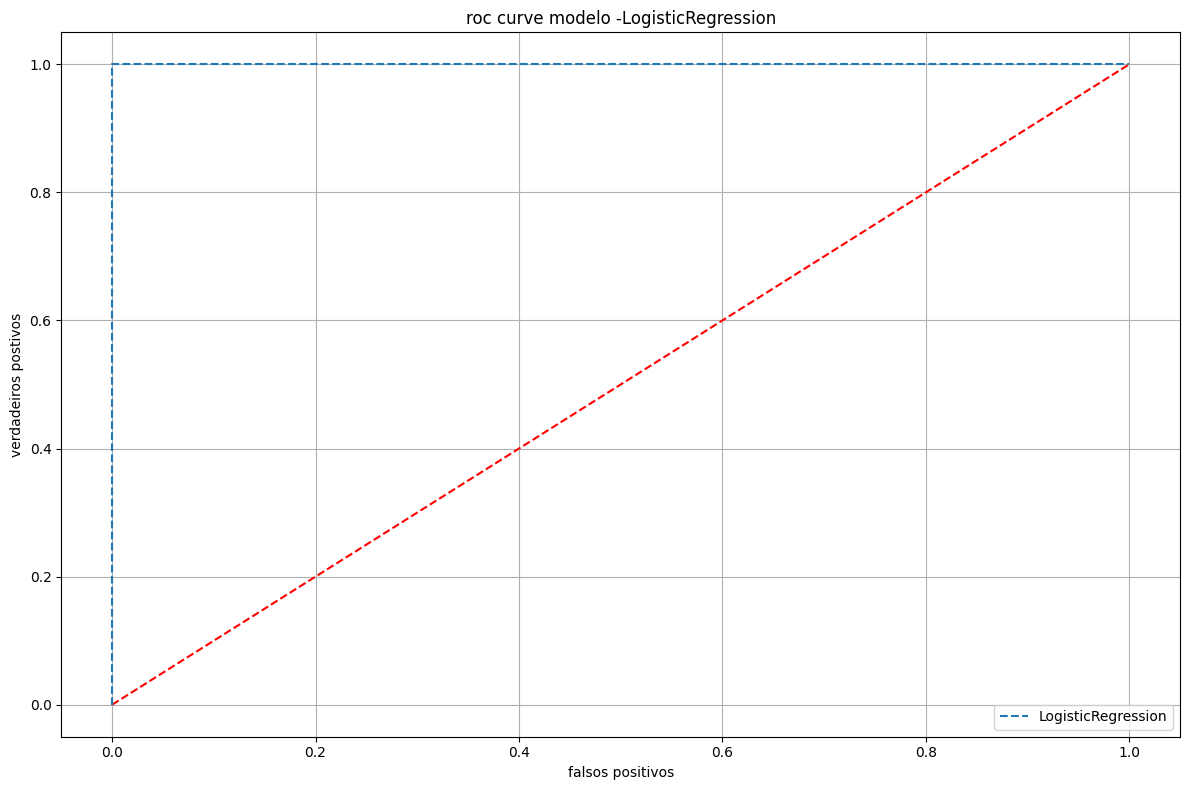

treinando modelo: DecisionTreeClassifier


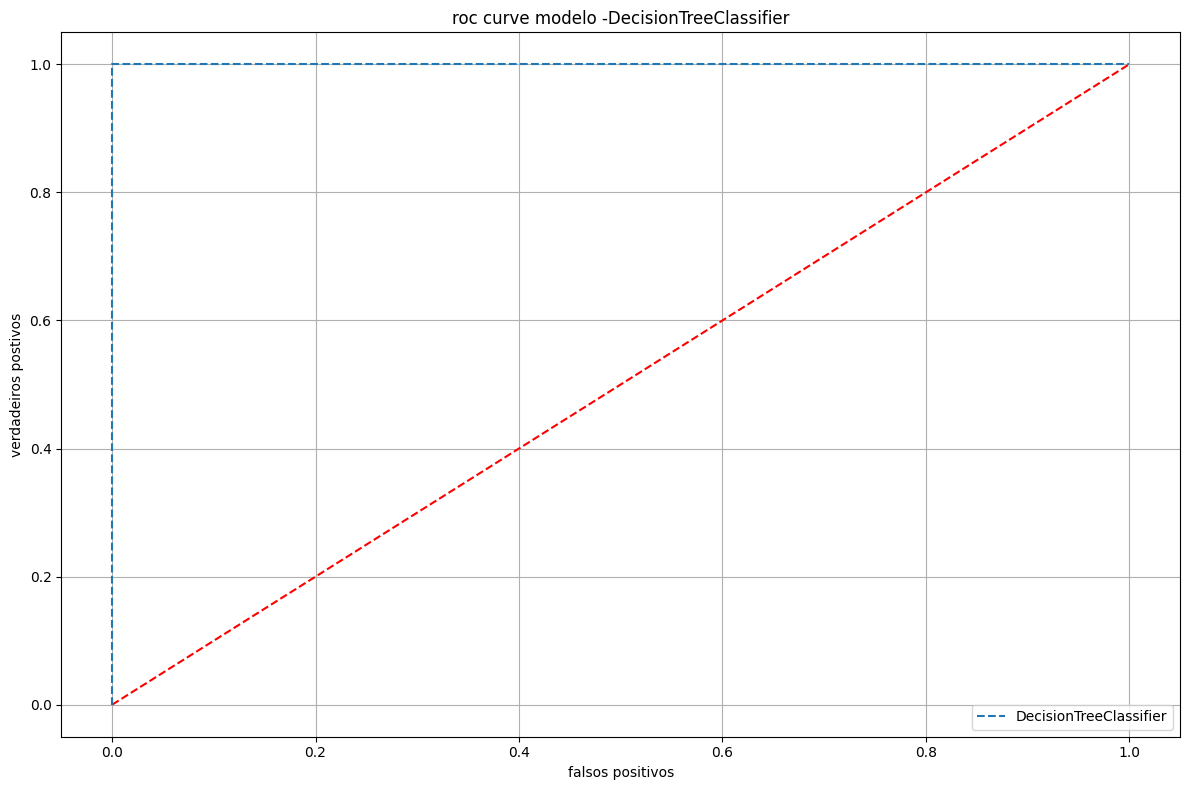

treinando modelo: XGBClassifier


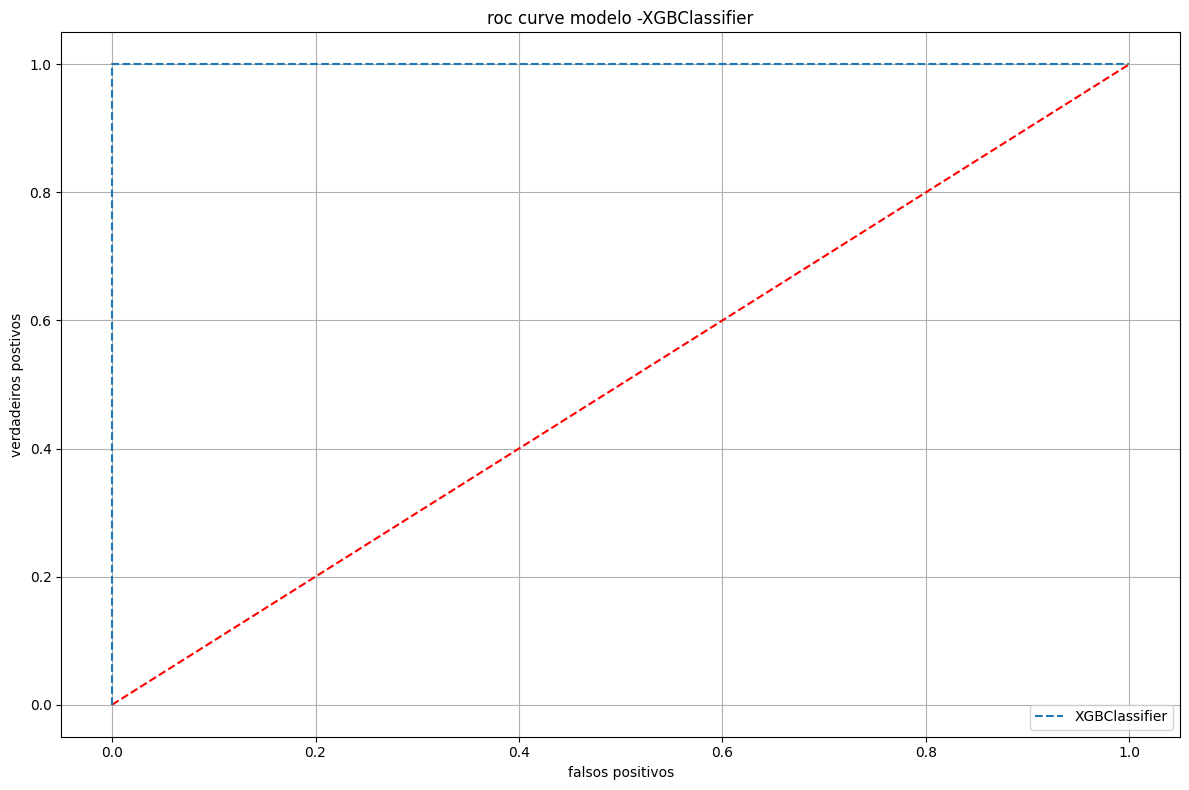

======== Avaliação dos modelos ========


,model_name,acuracia,precisao,f1_score,recall,roc_auc
0,LogisticRegression,1.00000,1.0,1.000000,1.000000,1.000000
1,DecisionTreeClassifier,1.00000,1.0,1.000000,1.000000,1.000000
2,XGBClassifier,0.99992,1.0,0.999742,0.999483,0.999483


In [71]:
# laço de treinamento dos modelos 
list_metrics = []
for i, model in models.items():
    print(f'treinando modelo: {model.__class__.__name__}')
    pipe.set_params(model=model).fit(x_train, y_train)
    y_pred = pipe.predict(x_test)
    y_proba = pipe.predict_proba(x_test)[:,1]
    metrics_ = metrics(model=model, y_true=y_test, y_pred=y_pred)
    list_metrics.append(metrics_)
    # plotando curva roc
    roc_curve_plot(y_true=y_test, y_proba=y_proba, model=model)
print('======== Avaliação dos modelos ========')
metrics_df = pd.DataFrame(list_metrics)
display(metrics_df)

    